# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Testing citipy modul
city1 = citipy.nearest_city(22.99, 120.21)
print(city1)
print(city1.city_name)
print(city1.country_code)
# print(weather_api_key)

tainan
tw


## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0:10])


600
['vaitupu', 'alotau', 'bambous virieux', 'hobart', 'barrow', 'ushtobe', 'jamestown', 'dongsheng', 'cururupu', 'barentsburg']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).




In [44]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [45]:
# set up lists to hold reponse info
city_data = []
cloudiness = []
country = []
date = []
humidity =[]
lat = []
lng = []
max_temp = []
wind_speed =[]
count = 0


# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
#         pprint(response)
        city_data.append(response['name'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except (KeyError, IndexError):
        count +=1
print(f"Missing field/result... skipping. {count}") 
        
# print(f"city: {city_data}" )
# print(f"country: {country}")
# print(f"cloudiness: {cloudiness}")
# print(f"date: {date}")
# print(f"humidity: {humidity}")
# print(f"lat: {lat}")
# print(f"lng: {lng}")
# print(f"max_temp: {max_temp}")
# print(f"wind_speed: {wind_speed}")

Missing field/result... skipping. 52


In [32]:

print(f"city: {len(city_data)}" )
print(f"country: {len(country)}")
print(f"cloudiness: {len(cloudiness)}")
print(f"date: {len(date)}")
print(f"humidity: {len(humidity)}")
print(f"lat: {len(lat)}")
print(f"lng: {len(lng)}")
print(f"max_temp: {len(max_temp)}")
print(f"wind_speed: {len(wind_speed)}")


city: 559
country: 559
cloudiness: 559
date: 559
humidity: 559
lat: 559
lng: 559
max_temp: 559
wind_speed: 559


In [33]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_data,
    "Country" :  country,    
    "Cloudiness": cloudiness,
    "Date":  date,
    "Humidity" : humidity,  
    "Lat" : lat,
    "Lng": lng,
    "Max Temp" :  max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,US,90,1579771351,88,22.08,-159.32,21.00,2.60
1,Port Alfred,ZA,100,1579771934,82,-33.59,26.89,21.67,1.79
2,Mataura,NZ,76,1579771934,86,-46.19,168.86,14.44,1.34
3,Beringovskiy,RU,100,1579771371,98,63.05,179.32,-22.21,2.25
4,Kemi,FI,90,1579771764,85,65.74,24.56,-9.00,3.10


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
weather_data.to_csv('output.csv')
weather_data.count()

City          559
Country       559
Cloudiness    559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [46]:
weather_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,US,90,1579771351,88,22.08,-159.32,21.00,2.60
1,Port Alfred,ZA,100,1579771934,82,-33.59,26.89,21.67,1.79
2,Mataura,NZ,76,1579771934,86,-46.19,168.86,14.44,1.34
3,Beringovskiy,RU,100,1579771371,98,63.05,179.32,-22.21,2.25
4,Kemi,FI,90,1579771764,85,65.74,24.56,-9.00,3.10


In [84]:
from datetime import date
today = date.today()
print(today)


2020-01-23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

The r-squared is: -0.7845112719816696
The equation of the regression line is: y = -0.42x + 19.23


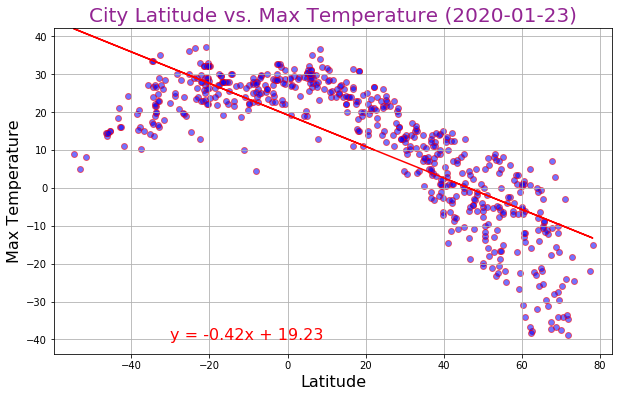

In [85]:
# Latitude vs. Temperature Plot
# Add the linear regression equation and line to plot
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, -40),fontsize=16,color="red")

# To change the size of your pie chart/figure
fig = plt.gcf()
fig.set_size_inches(10,6)

# Creating a title, x label, and y label 
plt.title(f"City Latitude vs. Max Temperature ({today})", fontsize=20, color='purple', alpha=0.85)
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Max Temperature', fontsize=16)

# Create x limits of our scatter plot 
plt.xlim(weather_data['Lat'].min()-5, weather_data['Lat'].max()+5)

# Create y limits of our scatter plot
plt.ylim(weather_data['Max Temp'].min() - 5, weather_data['Max Temp'].max()+5)

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the plotted figures as .pngs
fig.savefig('Lat vs MaxTemp.png')

plt.grid()
plt.show()

#### Latitude vs. Temperature Plot

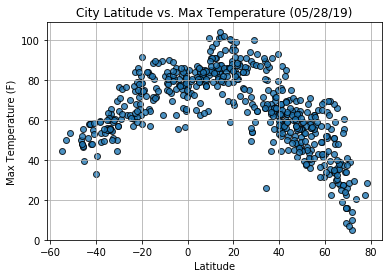

The r-squared is: 0.21070550120906584
The equation of the regression line is: y = 0.14x + 70.29


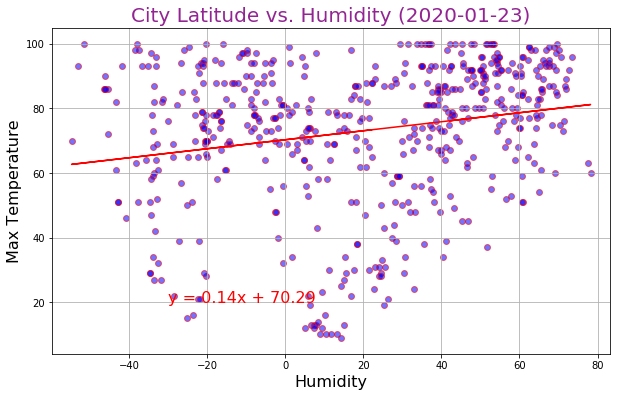

In [87]:
# Latitude vs. Humidity Plot
# Add the linear regression equation and line to plot
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 20),fontsize=16,color="red")

# To change the size of your pie chart/figure
fig = plt.gcf()
fig.set_size_inches(10,6)

# Creating a title, x label, and y label 
plt.title(f"City Latitude vs. Humidity ({today})", fontsize=20, color='purple', alpha=0.85)
plt.xlabel('Humidity', fontsize=16)
plt.ylabel('Max Temperature', fontsize=16)

# Create x limits of our scatter plot 
plt.xlim(weather_data['Lat'].min()-5, weather_data['Lat'].max()+5)

# Create y limits of our scatter plot
plt.ylim(weather_data['Humidity'].min() - 5, weather_data['Humidity'].max()+5)

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the plotted figures as .pngs
fig.savefig('Lat vs Humidity.png')

plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

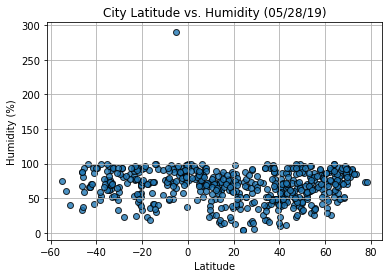

#### Latitude vs. Cloudiness Plot

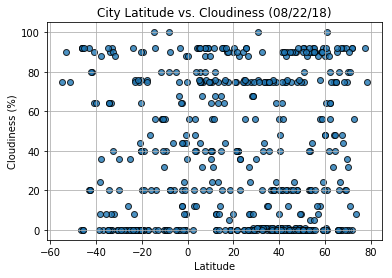

#### Latitude vs. Wind Speed Plot

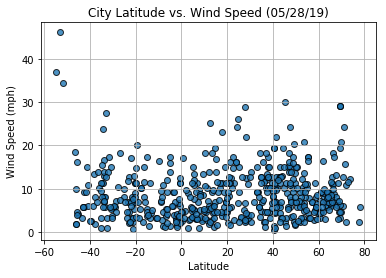

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


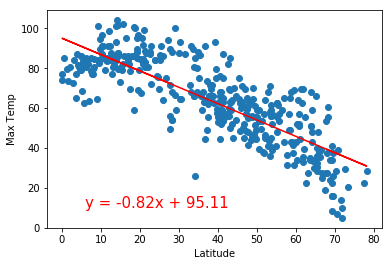

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


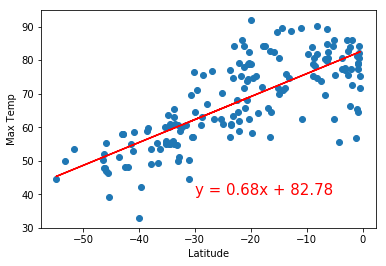

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


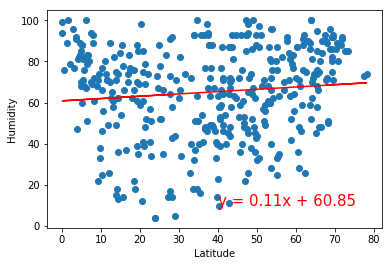

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


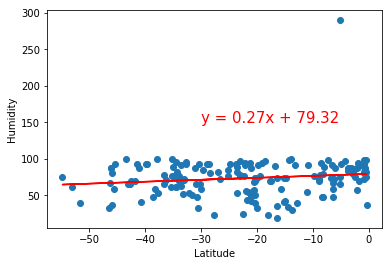

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


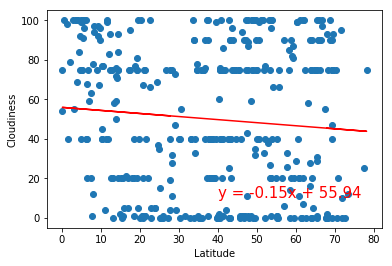

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


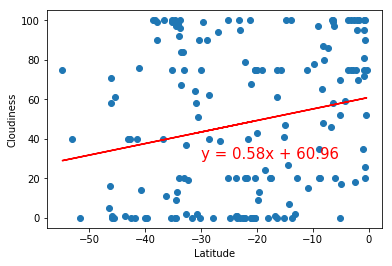

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


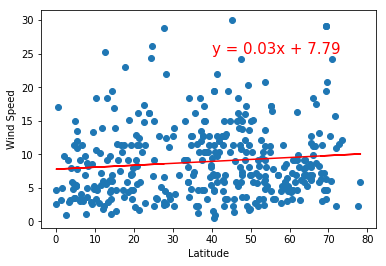

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


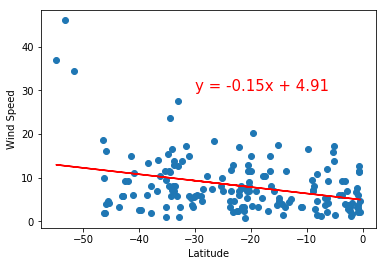